# Exploratory Data Analysis - Haberman's Survival Dataset


### Objective

To perform Exploratory Data Analysis on Haberman's data to better understand the data/features which will help in classifying whether a patient undergoing Cancer treatment will survive the treatment or not.

### Dataset Information

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### Column Information

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
    - 1 = the patient survived 5 years or longer 
    - 2 = the patient died within 5 year


### Additional Information

**Axillary Lymph Nodes**   
Sometimes, breast cancer can spread to the axillary lymph nodes, which are in a person's armpits.
The number of axillary lymph nodes can vary from person to person, ranging from 5 nodes to more than 30.
When someone is diagnosed with breast cancer, knowing if cancer has spread to their axillary lymph nodes can determine the type of treatment they have.   


**For documenting the observations following conventions are used:**
* Patients who survived more than 5 years after treatment are referred to as **survivors**
* Patients who could not survive more than 5 years after treatment are referred to as **non-survivors**.
* Postive Axillary Lumph Nodes are abbreviated as **PALN**   


**Reference(s)**:  

Dataset source: https://www.kaggle.com/gilsousa/habermans-survival-data-set   
UCI Machine Learning Archives: https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival  
Medical News Today: https://www.medicalnewstoday.com/articles/319713.php

### Importing Modules and Data and running quick checks on data

In [6]:
#Importing the modules which may be needed for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs

In [12]:
#Prior to pulling the dataset while looking at the csv I observed that the headers were missing. 

haberman = pd.read_csv(r'G:\DataScience\AAIC\Notes\EDA\haberman.csv',header = None,
                 names = ['age','year_of_op','pos_axillary','survival_sts'])

In [13]:
#After pulling data, a quick check @ head and tail(top and bottom 5 rows) to make sure that data is pulled correctly.   

haberman.head()

,age,year_of_op,pos_axillary,survival_sts
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [14]:
haberman.tail()

,age,year_of_op,pos_axillary,survival_sts
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [15]:
#Checking the number of total rows * columns.
haberman.shape

(306, 4)




## Exploratory Data Analysis


In [110]:
#Firstly, we should have an overall look at the data to understand the variables.
haberman.describe()

,age,year_of_op,pos_axillary,survival_sts
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Observations**

* Patients' age ranges from 30 to 83, with average age being ~52 years.
* Number of Positive axillary ranges from 0 to 52, with average number being 4.
* Since yr_of_op is a  measure of Time dimension, hence we can safely assume it to be categorical.
* From the information provided about data, we know that survival_sts is categorical.

We should further analyze data by univariate and bivariate analysis.

In [111]:
haberman['survival_sts'].value_counts()

1    225
2     81
Name: survival_sts, dtype: int64

This means that out of 306 patients 225 survived for more than 5 years and the rest 81 did not.

### Univariate Analysis

#### PALN

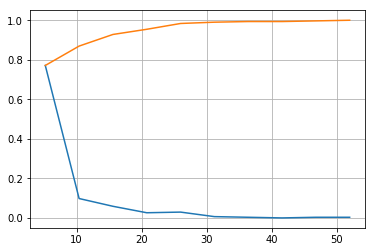

In [23]:

counts, bins = np.histogram(haberman['pos_axillary'],bins=10)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bins[1:],pdf)
plt.plot(bins[1:],cdf)
plt.grid()
plt.show()

**Observation**

* Approximately 90% of the patients have 12 or less than 12 PALN.

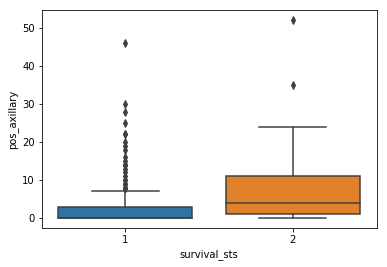

In [24]:
sbs.boxplot(x = 'survival_sts',y = 'pos_axillary',data = haberman)

plt.show()

**Observation**

* Median of survivors is 0 as compared to median of 4 for non-survivors. 
This means that out of all the survivors atleast 50% of them had no PALN.   

Thus, we can say that if a person has no PALN then they have a higher chance of survival and we should be able to classify as survivors. It would also mean that almost 36% of the total population being survivors regardless of their age.

* Patient having more than 50 PALN should be classified as non-survivor.


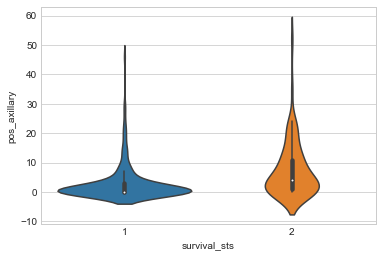

In [106]:
sbs.violinplot(x = 'survival_sts',y = 'pos_axillary',data = haberman,size = 5)
plt.show()

#### Age of Pateint

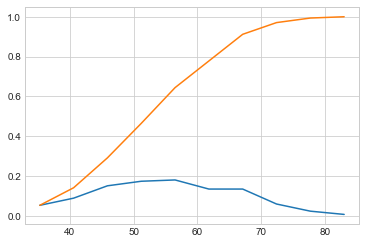

In [112]:
counts, bins = np.histogram(haberman['age'],bins=10)

pdf = counts/sum(counts)

cdf = np.cumsum(pdf)
plt.plot(bins[1:],pdf)
plt.plot(bins[1:],cdf)

plt.show()

**Observation**

* Approximately 90% of the patients were 66 years or less at the time of operation.

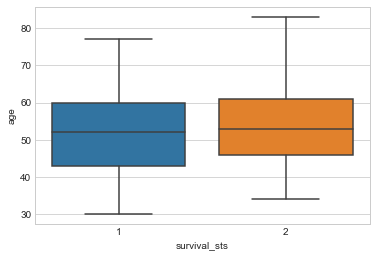

In [99]:
sbs.boxplot(x = 'survival_sts',y = 'age',data = haberman) 
plt.show()

**Observations - Boxplot and Violin Plot**

* Median of survivors is approx 53 years as compared to median of 54 years for non-survivors. 
* The range for survivors ranges from 30 to 77 years whereas the range for non-survivors ranges from 35 to 83 years.

From the violin plot below we can see that both survivors and non-survivors are spread across the age range, with survivors having most frequent age as 55 years compared to 50 years of non-survivors.

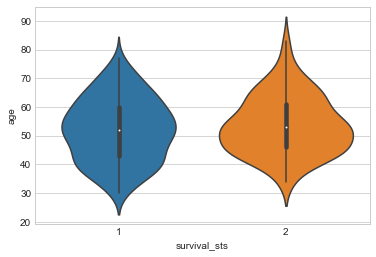

In [104]:
# Violin Plot for Age by Survival Status
sbs.violinplot(x = 'survival_sts',y = 'age',data = haberman,size = 5)
plt.show()

C:\Users\SARANSH\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\SARANSH\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


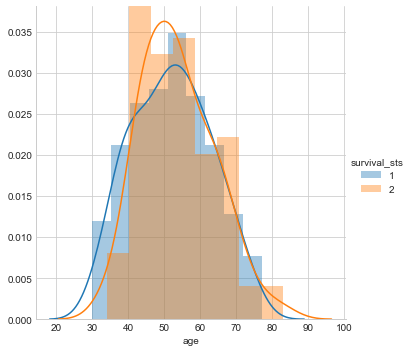

In [117]:
# Distribution Plot for Age by Survival Status
sbs.FacetGrid(haberman,hue = 'survival_sts',size = 5) \
    .map(sbs.distplot,'age') \
    .add_legend()
plt.show()

**Observation**

Although both the distributions are almost overlapping, but it can still be inferred that if a person is between **30 to 35 years** then they can be classified as a **survivor**, however patients with age **more than 77 years can be classified as non-survivors**. 

### Bivariate Analysis

#### PALN v. Age

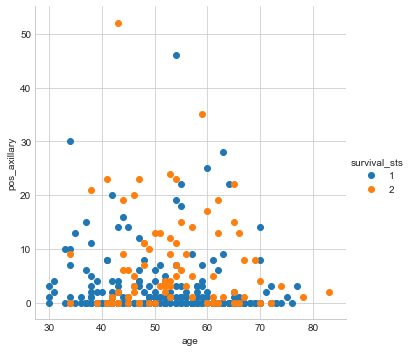

In [47]:
# Scatter plot between age and pos_axillary by Survival status

sbs.set_style("whitegrid");
sbs.FacetGrid(haberman,hue = 'survival_sts', size = 5) \
    .map(plt.scatter, "age", "pos_axillary") \
    .add_legend();

plt.show()

**Observations**

* The patients under age of 40 have a better chance of survival, since only 4 patients could not survive.
* Patients between age of 40-50 years and having less than 10 PALN have lower chance of survival.


## Final Thoughts

* Patients under age of 35 years should be classified as survivors while patients having age more than 77 years should be non-survivors.
* The major insight is that if a patient has no PALN signs then they are highly likely to be survivors.
* Patients having more than 50 PALN are likely to be non-survivors.
* Patients with age less than 40 years are more likely to survive.

**By performing EDA on the Haberman dataset we can say that the PALN if the most important feature to classify whether a patient will survive for more than 5 years after the treatment or not**   

**Also, age of patient undergoing operation becomes an important feature since patients in younger age group had a better chance of survival than older groups**



#### Note: Pair plot are not considered while doing Bivariate analysis since the number of features were only PALN and age and other variables were categorical data.